<a href="https://colab.research.google.com/github/rakibulhaque9954/Emotion_detection_model/blob/main/Emotion_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libararies and Installations

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
import wandb
import matplotlib.pyplot as plt
from keras.layers import InputLayer, Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Dropout, Rescaling, RandomRotation, RandomFlip, RandomContrast
from keras.regularizers import L2
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
import tensorflow_probability as tfp
from keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
# from tensorflow.train import BytesList, Floatlist, Int64List
# from tensorflow.train import Example, Features, Feature

In [ ]:
!pip3 install scikit-learn




  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/e1/5f/0b5b11fd766b674b0eb887e15006175503f23c230ced2a22fb186262e1e5/scikit_learn-1.3.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.5 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [ ]:
!pip3 install wandb==0.15.9

In [ ]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rakibulhaque9954. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init('Emotion-Detection-project', entity = 'rakibulhaque9954')

In [ ]:
!pip install opencv-python

  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)


## make kaggle dir and downloading dataset

In [ ]:
!pip install kaggle

  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=2c5a60b44f39d696959d074bd413c84b6c3f8064be01f39d216a4abe9fddf7a4
  Stored in directory: /Users/boss/Library/Caches/pip/wheels/b2/3d/88/839f363f3ce6b71785b8a95627cd52cb5359e54aba76a7ab76
Successfully built kaggle


In [ ]:
# ! mkdir ~/.kaggle
! cp /Users/boss/Desktop/Python_files.nosync/Kaggle.nosync/kaggle.json ~/.kaggle/

In [ ]:
# giving user raed and write rights in kaggle file
! chmod 600 kaggle/kaggle.json

chmod: kaggle/kaggle.json: No such file or directory


In [ ]:
# copying api command of dataset from kaggle and downloading
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

100%|████████████████████████████████████████| 309M/309M [01:17<00:00, 3.03MB/s]
100%|████████████████████████████████████████| 309M/309M [01:17<00:00, 4.19MB/s]


In [ ]:
!cd /Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model


In [ ]:
! mkdir kaggle

In [ ]:
! cp /Users/boss/Desktop/Python_files.nosync/Kaggle.nosync/kaggle.json /Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/kaggle

In [ ]:
!unzip '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/human-emotions-datasethes.zip' -d '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/dataset'

# Data Preprocessing

In [ ]:
train_directory = '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/dataset/Emotions Dataset/Emotions Dataset/train'
# using test dataset as val dataset
validation_directory = '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/dataset/Emotions Dataset/Emotions Dataset/test'
CLASS_NAMES = ['angry', 'happy', 'sad'] # keep the order of the classses for consistency

In [ ]:
CONFIGURATION = wandb.CONFIGURATION = {
    'BATCH_SIZE' : 32,
    'IM_SIZE': 256,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 20,
    'DROPOUT_RATE': 0.0,
    'REGULARIZATION_RATE': 0.0,
    'N_FILTERS': 6,
    'KERNEL_SIZE': 3,
    'N_STRIDES': 1,
    'POOL_SIZE': 2,
    'N_DENSE_1': 100,
    'N_DENSE_2': 10,
    'NUM_CLASSES': 3

}

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = CLASS_NAMES,
    color_mode= 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    seed = 99,
    shuffle = True

)

Found 6799 files belonging to 3 classes.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = CLASS_NAMES,
    color_mode= 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    seed = 99,
    shuffle = True

)

Found 2278 files belonging to 3 classes.


In [ ]:
for i in val_dataset.take(1):
  # visualizing labels and their respective values
  print(i) # binary vectors or int class depending on the mode

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

# Dataset Visualization

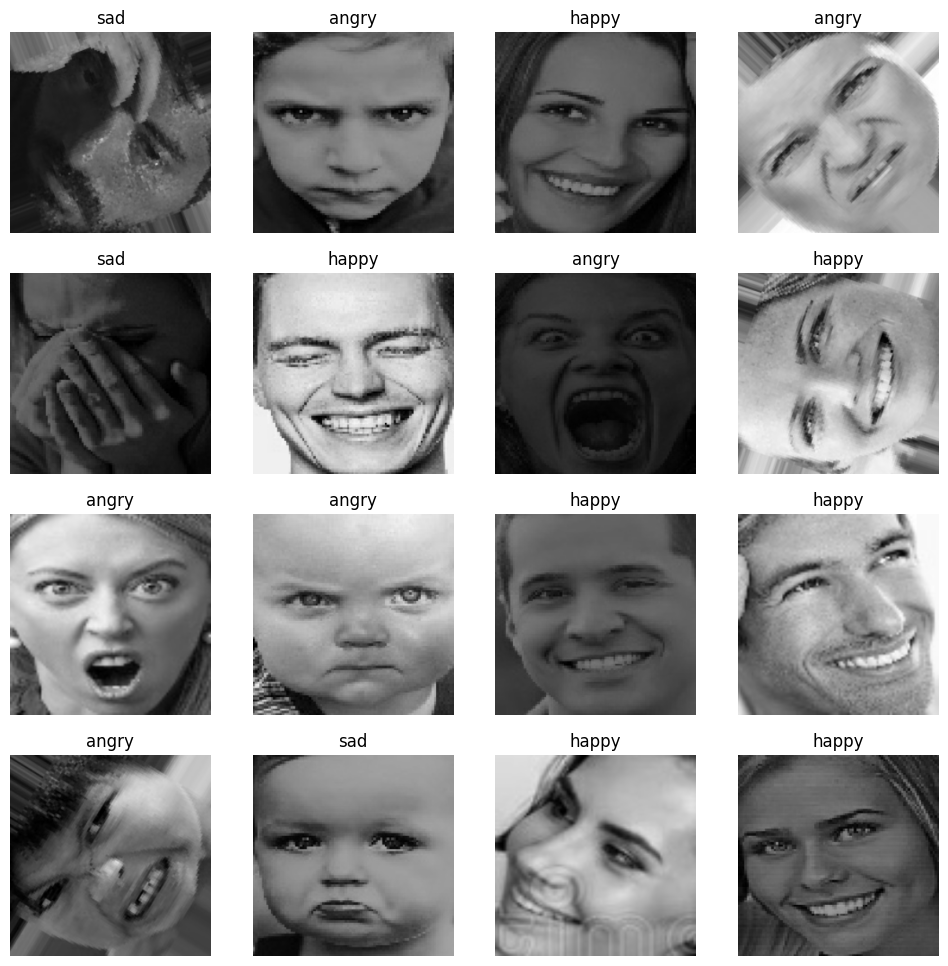

In [ ]:
plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1): #taking 1 batch of images
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i]/255.0) # normalization
    label_index = tf.argmax(labels[i]).numpy()
    plt.title(CLASS_NAMES[label_index])
    # plt.title((tf.argmax(labels[i])).numpy()) printing when printing the index value of classes when using bianry vector mode
    ax.axis('off')

# Data Augmentation



In [ ]:
augment_layers = tf.keras.Sequential([
    RandomRotation(factor= (-0.025, 0.025)), # rotation is limited
    RandomFlip(mode= 'horizontal'),
    RandomContrast(factor= 0.1)

])

In [ ]:
def augment_layer(image, label):
    return augment_layers(image, training = True), label

## Cutmix augmentation

In [ ]:
def box(lamda):
  # lamda = tfp.distributions.Beta(0.2, 0.2) # generates random values based on probabilites and proportions
  # lamda = lamda.sample(1)[0]

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION['IM_SIZE'] * tf.math.sqrt(1 - lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION['IM_SIZE'] * tf.math.sqrt(1 - lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w // 2, 0, CONFIGURATION['IM_SIZE'])
  r_y = tf.clip_by_value(r_y - r_h // 2, 0, CONFIGURATION['IM_SIZE']) # this method_makes sure that the value stays only between 0, IM_SIZE not negative

  x_b_r = tf.clip_by_value(r_x + r_w // 2, 0, CONFIGURATION['IM_SIZE'])
  y_b_r = tf.clip_by_value(r_y + r_h // 2, 0, CONFIGURATION['IM_SIZE']) # x_b_r is x bottom right and clip is to make the sure value is always inside the image bounds

  r_w = x_b_r - r_x
  if (r_w == 0):
    r_w = 1

  r_h = y_b_r - r_y
  if (r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(0.2, 0.2) # generates random values based on probabilites and proportions
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda) # calling the function that creats random box in the image

  crop_1 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  crop_2 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  image = image_1 - pad_2 + pad_1

  # for label
  lamda = tf.cast(1 - (r_w * r_h) / (CONFIGURATION['IM_SIZE'] * CONFIGURATION['IM_SIZE']) , dtype= tf.float32)
  label = lamda* tf.cast(label_1, dtype = tf.float32) + (1-lamda)* tf.cast(label_2, dtype = tf.float32)

  return image, label

In [ ]:
# data preparation for cutmix
train_dataset_1 = train_dataset.map(augment_layer, num_parallel_calls= tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer, num_parallel_calls= tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [ ]:
training_dataset = (
    mixed_dataset
    .map(cutmix, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
    )

# Dataset Preparation

In [ ]:
# training_dataset = (
#     train_dataset
#     .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)
# )
# using cutmix thats why in comments

In [ ]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
resize_rescale_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    tf.keras.layers.Rescaling(1./255)
]) # its good for deployment and prevents extra steps

# Modeling

In [ ]:

model = tf.keras.Sequential([
    InputLayer(input_shape = (None, None, 3)), # because resize and rescale layers are passed down

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION['N_FILTERS'], kernel_size = CONFIGURATION['KERNEL_SIZE'], strides = CONFIGURATION['N_STRIDES'],
           activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'], strides = CONFIGURATION['N_STRIDES'] * 2),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    Conv2D(filters = CONFIGURATION['N_FILTERS'] * 2 + 4, kernel_size = CONFIGURATION['KERNEL_SIZE'], strides = CONFIGURATION['N_STRIDES'],
           activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    MaxPool2D(pool_size = CONFIGURATION['POOL_SIZE'], strides = CONFIGURATION['N_STRIDES'] * 2),

    Flatten(),

    Dense(CONFIGURATION['N_DENSE_1'], activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION['DROPOUT_RATE']),

    Dense(CONFIGURATION['N_DENSE_2'], activation = 'relu', kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_RATE'])),
    BatchNormalization(),

    Dense(CONFIGURATION['NUM_CLASSES'], activation = 'softmax')

])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)     

# Training

In [ ]:
# when the dataset is in vector mode or categorical mode [0, 1, 0] belongs to class 2 for instance
loss_function = CategoricalCrossentropy()
# incase our dataset mode is int where labels are [0, 1, 2]then we use:
# loss_function = SparseCategoricalCrossentropy()

In [ ]:
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k = 2, name = 'top_k_accuracy')]
loss_function = CategoricalCrossentropy()

In [ ]:
model.compile(
    optimizer =  tf.keras.optimizers.legacy.Adam(learning_rate = CONFIGURATION['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics
)

In [ ]:
history = model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose = 1
)

Epoch 1/20
213/213 [==============================] - 76s 352ms/step - loss: 1.0139 - accuracy: 0.5138 - top_k_accuracy: 0.7939 - val_loss: 1.0290 - val_accuracy: 0.5026 - val_top_k_accuracy: 0.7836
Epoch 2/20
213/213 [==============================] - 74s 346ms/step - loss: 0.9160 - accuracy: 0.6039 - top_k_accuracy: 0.8467 - val_loss: 0.9938 - val_accuracy: 0.5263 - val_top_k_accuracy: 0.8007
Epoch 3/20
213/213 [==============================] - 78s 360ms/step - loss: 0.8820 - accuracy: 0.6169 - top_k_accuracy: 0.8551 - val_loss: 1.2071 - val_accuracy: 0.4183 - val_top_k_accuracy: 0.7147
Epoch 4/20
213/213 [==============================] - 74s 345ms/step - loss: 0.8443 - accuracy: 0.6455 - top_k_accuracy: 0.8772 - val_loss: 0.8011 - val_accuracy: 0.6387 - val_top_k_accuracy: 0.8771
Epoch 5/20
213/213 [==============================] - 76s 354ms/step - loss: 0.8098 - accuracy: 0.6700 - top_k_accuracy: 0.8915 - val_loss: 0.8164 - val_accuracy: 0.6238 - val_top_k_accuracy: 0.8723
Epoch

# Model loss and accuracy Visualization

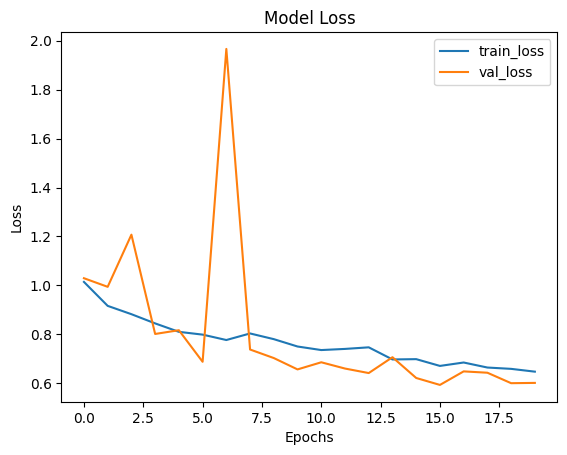

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

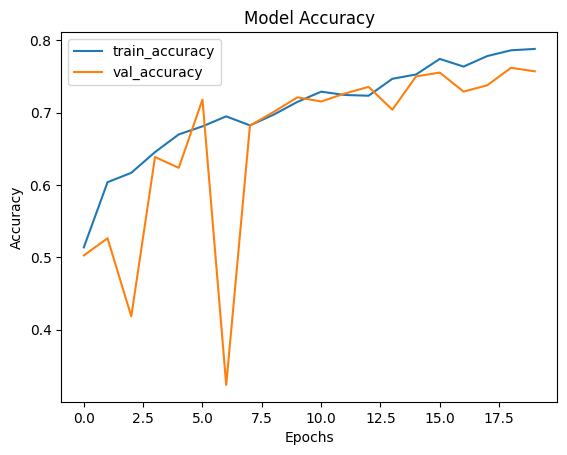

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Evaluation

In [ ]:
model.evaluate(validation_dataset)

72/72 [==============================] - 6s 76ms/step - loss: 0.6010 - accuracy: 0.7572 - top_k_accuracy: 0.9175


[0.6009644269943237, 0.7572432160377502, 0.9174714684486389]

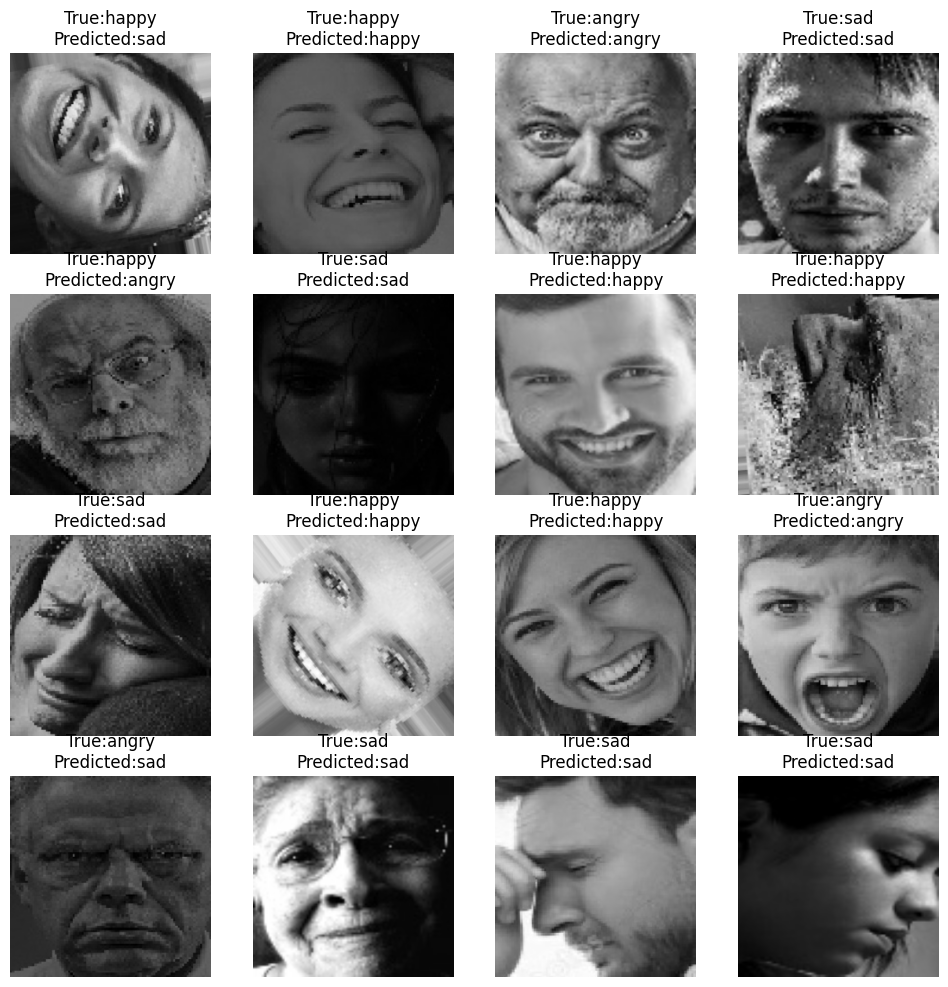

In [ ]:
plt.figure(figsize = (12, 12))
for images, labels in validation_dataset.take(1): #taking 1 batch of images
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i]/255.0) # normalization
    label_index = tf.argmax(labels[i]).numpy()
    predicted_index = tf.argmax(model(tf.expand_dims(images[i], axis = 0)).numpy()[0])
    plt.title('True:' + CLASS_NAMES[label_index] + '\n' + 'Predicted:' + CLASS_NAMES[predicted_index])
    ax.axis('off')

In [ ]:
13/16

0.8125

# Testing

In [ ]:
test_image = cv2.imread('/content/dataset/Emotions Dataset/Emotions Dataset/test/sad/116356.jpg_brightness_2.jpg')

# converting image to tensor
image = tf.constant(test_image, dtype = tf.float32)

# expanding dimensions or batching
image = tf.expand_dims(axis = 0) # axis = 0 means adding dimesion along the front for instance: (224, 224, 3) -> (0, 224, 224, 3) batched tensor

print(CLASS_NAMES[tf.argmax(model(image), axis = -1).numpy()[0]]) # printing alongwith class since our dataset was preset with vector mode

# Confusion matrix

In [ ]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted.append(model(im))
    labels.append(label.numpy())


In [ ]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[1 1 0 ... 1 0 2]
[1 1 1 ... 1 0 1]


In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
label = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[306  92 117]
 [ 34 839 133]
 [ 55 122 580]]


Text(0.5, 58.7222222222222, 'Predicted')

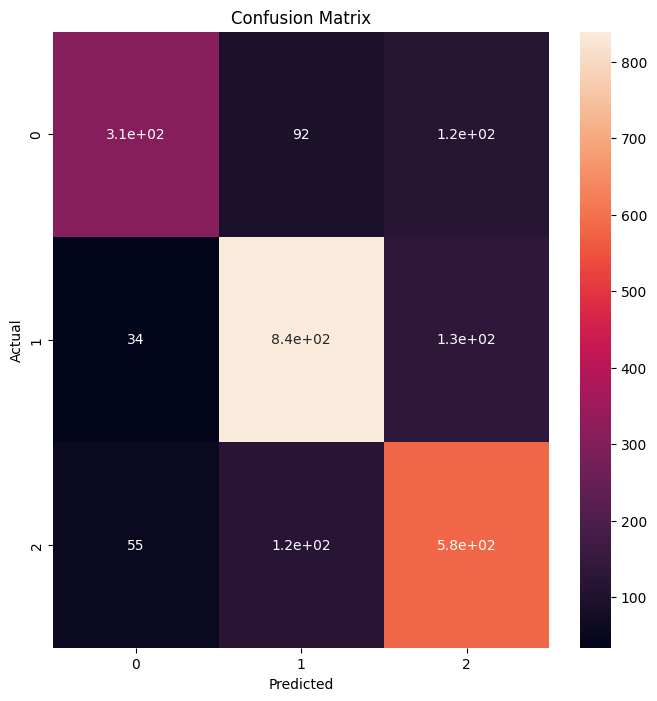

In [ ]:
cm = confusion_matrix(label , pred)
print(cm)
plt.figure(figsize=(8, 8))

sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
model.save('trained_model.h5')

# Tensorflow Records

## Augmenting Dataset before creating records and sending to unbacthing

In [ ]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
)

In [ ]:
validation_dataset = (
    val_dataset
    # .prefetch(tf.data.AUTOTUNE)
)

## Unabatching

In [ ]:
training_dataset = (
    training_dataset
    .unbatch()
)

In [ ]:
validation_dataset = (
    validation_dataset
    .unbatch()
)

In [ ]:
def create_example(image, label):
    bytes_feature = tf.train.Feature(
        bytes_list = tf.train.BytesList(value = [image])
    )

    int_feature = tf.train.Feature(
        int64_list = tf.train.Int64List(value = [int(label[0])])
    )

    example = tf.train.Example(
        features = tf.train.Features( feature =
                                    {
                                        'labels' : int_feature, # because classes are in int
                                        'images' : bytes_feature # because images are supposed to be in bytes
                                    })
    )
    return example.SerializeToString()

In [ ]:
NUM_SHARDS = 10
PATH = '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_{:02d}.tfrecord'


In [ ]:
def encode_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io.encode_jpeg(image)
    return image, label

In [ ]:
encoded_dataset = (
    training_dataset
    .map(encode_image)
)

## Saving the dataset

In [ ]:
for shard_number in range(NUM_SHARDS):

    sharded_dataset = (
        encoded_dataset
        .shard(NUM_SHARDS, shard_number)
        .as_numpy_iterator()
    )

    with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
        for image, label in sharded_dataset:
            file_writer.write(create_example(image, label))

## Reconstruction of Dataset for usage

In [ ]:
reconstruct_dataset = tf.data.TFRecordDataset(filenames= [ PATH.format(p) for p in range(NUM_SHARDS)])

In [ ]:
l = [ PATH.format(p) for p in range(NUM_SHARDS)]
print(l)

['/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_00.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_01.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_02.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_03.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_04.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_05.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_06.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_07.tf

In [ ]:
def parse_tfrecords(example):

    feature_description = {
        'images' : tf.io.FixedLenFeature([], tf.string),
        'labels' : tf.io.FixedLenFeature([], tf.int64)
    }

    example = tf.io.parse_single_example(example, feature_description)
    example['images'] = tf.io.decode_jpeg(example['images'], channels = 3)

    return example['images'], example['labels']

In [ ]:
parsed_dataset = (
    reconstruct_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION['BATCH_SIZE'])
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
for i in parsed_dataset.take(1):
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=uint8, numpy=
array([[[[131, 131, 131],
         [ 73,  73,  73],
         [165, 165, 165],
         ...,
         [ 55,  55,  55],
         [125, 125, 125],
         [200, 200, 200]],

        [[138, 138, 138],
         [188, 188, 188],
         [159, 159, 159],
         ...,
         [102, 102, 102],
         [ 35,  35,  35],
         [150, 150, 150]],

        [[238, 238, 238],
         [ 37,  37,  37],
         [ 39,  39,  39],
         ...,
         [137, 137, 137],
         [204, 204, 204],
         [164, 164, 164]],

        ...,

        [[ 77,  77,  77],
         [147, 147, 147],
         [134, 134, 134],
         ...,
         [120, 120, 120],
         [117, 117, 117],
         [ 52,  52,  52]],

        [[ 17,  17,  17],
         [145, 145, 145],
         [223, 223, 223],
         ...,
         [234, 234, 234],
         [  3,   3,   3],
         [249, 249, 249]],

        [[ 50,  50,  50],
         [ 31,  31,  31],
         [165, 1

In [ ]:
# the labels can be again preset to class numbers or int mode by using argmax